In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [4]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("I'm RS, I love AI!")

AIMessage(content="<think>\nOkay, the user mentioned they're RS and love AI. First, I should greet them warmly and express happiness about their interest in AI. Next, I need to ask how I can assist them. I should keep the tone friendly and open-ended to encourage them to ask anything. Also, make sure to mention that I'm trained by Alibaba Cloud and my name is Qwen. Keep it simple and conversational. Let me put that together.\n</think>\n\nHi RS! Nice to meet you! I'm Qwen, the AI assistant developed by Tongyi Lab. I'm really glad to hear you're interested in AI - it's such an exciting field with so many possibilities! How can I help you today? Whether you have questions about AI technology, want to discuss the latest developments, or just want to chat about your thoughts on AI, I'm here for you! ٩(◕‿◕｡)۶", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 189, 'prompt_tokens': 16, 'total_tokens': 205, 'completion_time': 0.444265996, 'prompt_time': 0.000440464

In [6]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

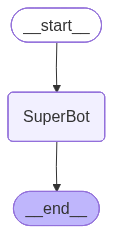

In [7]:
graph=StateGraph(State)

graph.add_node("SuperBot", superbot)

graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END) 

graph_builder = graph.compile(checkpointer=memory)

from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages': "Hi, I'm Razia, I love AI!"}, config=config)

{'messages': [HumanMessage(content="Hi, I'm Razia, I love AI!", additional_kwargs={}, response_metadata={}, id='86b55b6d-7a91-4336-8db5-161d707551fa'),
  AIMessage(content="<think>\nOkay, the user just introduced themselves as Razia and mentioned they love AI. I should respond in a warm and enthusiastic way to welcome her.\n\nFirst, I need to acknowledge her introduction and express happiness at meeting her. Then, since she loves AI, I should ask her what aspects of AI she's interested in to encourage further interaction. Maybe she's into technical details, applications, or ethical issues? By asking specific questions, I can better understand her needs and provide more targeted information.\n\nI should also consider possible follow-up questions she might have, like the future development of AI, practical applications, or learning resources. Being proactive in these aspects can help keep the conversation going.\n\nIn terms of language style, keep it friendly and approachable, avoid tech

In [9]:
config = {"configurable": {"thread_id": "2"}}

for chunk in graph_builder.stream({'messages': "Hi, I'm Razia, I love AI!"}, config=config, stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="<think>\nOkay, so the user introduced herself as Razia and mentioned she loves AI. I need to respond in a friendly and welcoming way. First, I should acknowledge her introduction and express that I'm glad to meet her. Then, since she loves AI, maybe ask her what aspects of AI interest her the most. That way, I can engage in a more meaningful conversation. I should keep the tone positive and enthusiastic. Let me make sure the response is concise but warm. Also, maybe offer help if she has any specific questions about AI. Yeah, that should cover it.\n</think>\n\nHello Razia! 🌟 It's wonderful to meet someone who loves AI! What aspects of AI excite you the most? Whether it's machine learning, natural language processing, or the future of AI, I'd love to hear your thoughts or help you explore any ideas you're curious about. Let's dive into the fascinating world of AI together! 😊", additional_kwargs={}, response_metadata={'token_usage': {'complet

In [10]:
config = {"configurable": {"thread_id": "2"}}

for chunk in graph_builder.stream({'messages': "Hi, I'm Razia, I love AI!"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content="Hi, I'm Razia, I love AI!", additional_kwargs={}, response_metadata={}, id='99533fc0-d6a2-46e2-acca-7968c888d5e0'), AIMessage(content="<think>\nOkay, so the user introduced herself as Razia and mentioned she loves AI. I need to respond in a friendly and welcoming way. First, I should acknowledge her introduction and express that I'm glad to meet her. Then, since she loves AI, maybe ask her what aspects of AI interest her the most. That way, I can engage in a more meaningful conversation. I should keep the tone positive and enthusiastic. Let me make sure the response is concise but warm. Also, maybe offer help if she has any specific questions about AI. Yeah, that should cover it.\n</think>\n\nHello Razia! 🌟 It's wonderful to meet someone who loves AI! What aspects of AI excite you the most? Whether it's machine learning, natural language processing, or the future of AI, I'd love to hear your thoughts or help you explore any ideas you're curious about

astream, async stream

In [11]:
config = {"configurable": {"thread_id": "4"}}

async for event in graph_builder.astream_events({"messages":["Hi, I'm Razia, I love AI!"]}, config, version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ["Hi, I'm Razia, I love AI!"]}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'f6d3a254-9cf1-44bb-a667-6485727ac0a7', 'metadata': {'thread_id': '4'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content="Hi, I'm Razia, I love AI!", additional_kwargs={}, response_metadata={}, id='7b6f4424-a0d3-44d9-bf06-a2c2b99cf8fd')]}}, 'name': 'SuperBot', 'tags': ['graph:step:1'], 'run_id': '60d75e07-f932-479c-b34f-086aa417ffcf', 'metadata': {'thread_id': '4', 'langgraph_step': 1, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:202c0c9c-ac6a-caa2-5d8b-c04a2890debc'}, 'parent_ids': ['f6d3a254-9cf1-44bb-a667-6485727ac0a7']}
{'event': 'on_chain_stream', 'run_id': '60d75e07-f932-479c-b34f-086aa417ffcf', 'name': 'SuperBot', 'tags': ['graph:step:1'], 'metadata': {'thread_id': '4', 'langgraph_